In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [39]:
df= pd.read_csv("D:\python\All ML\project\Algerian Forest Fire analysis\Algerian_Foresr_Fires_cleaned_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Subhankar Chand\AppData\Local\Temp\ipykernel_22368\745530019.py:1: SyntaxWarning: invalid escape sequence '\p'
  df= pd.read_csv("D:\python\All ML\project\Algerian Forest Fire analysis\Algerian_Foresr_Fires_cleaned_dataset.csv")


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [40]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [41]:
#drop day,months and year
df.drop(['day', 'month', 'year'],axis=1, inplace=True)

In [42]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [43]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [44]:
#Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [45]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [46]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [47]:
## Independent and dependent feaatures
x=df.drop('FWI',axis=1)
y=df['FWI']

In [48]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [49]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [50]:
# train testsplit
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [51]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [52]:
# Feature selection based on corellation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

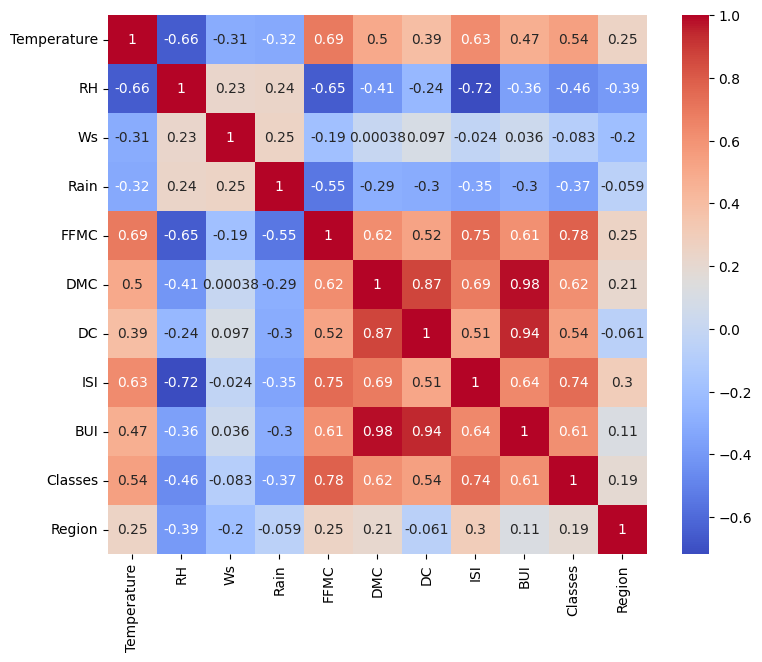

In [53]:
# chesk for multicollinearility
plt.figure(figsize=(9,7))
corr=x_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

In [54]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [55]:
# thresold-- Domain expertise
corr_features=correlation(x_train,0.85)

In [56]:
## drop feature when correlation is more than 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features,axis=1, inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

### Feature selection of Standardization

In [57]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [58]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

### Boxplot to understand the effect of standard Scaller

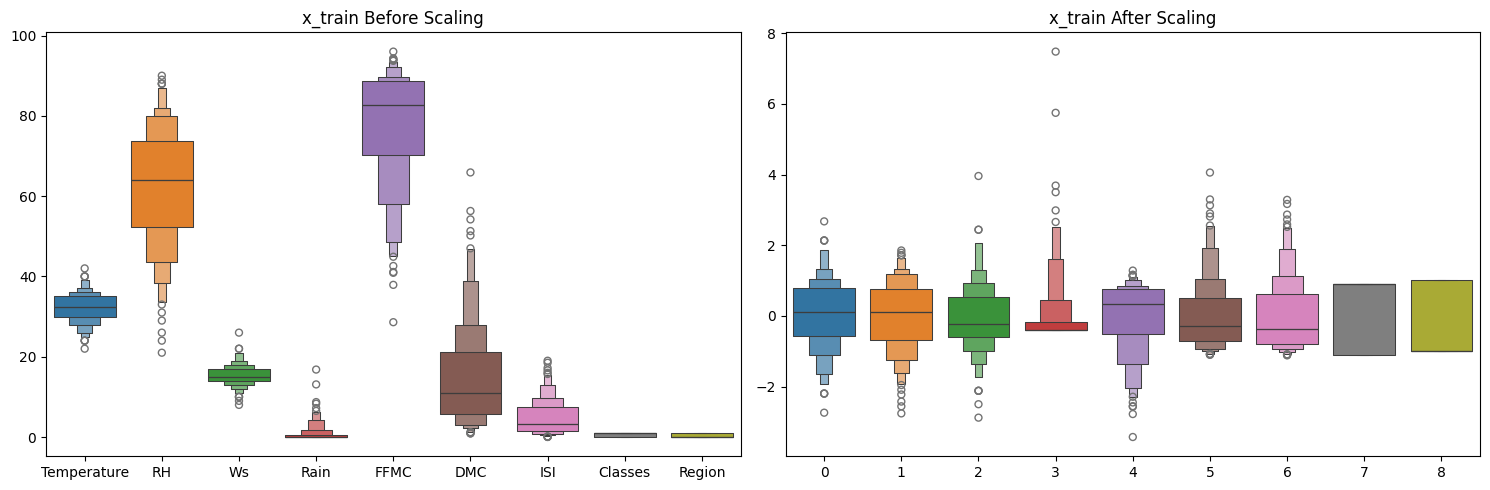

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))  # Set the figure size
plt.subplot(1, 2, 1)         # Create the first subplot
sns.boxenplot(data=x_train)
plt.title('x_train Before Scaling')

plt.subplot(1, 2, 2)         # Create the second subplot
sns.boxenplot(data=x_train_scaled)
plt.title('x_train After Scaling')

plt.tight_layout()           # Adjust layout to prevent overlap
plt.show()


### Linear Regression Model

Mean absolute error 0.5468236465249978
R2 score 0.9847657384266951


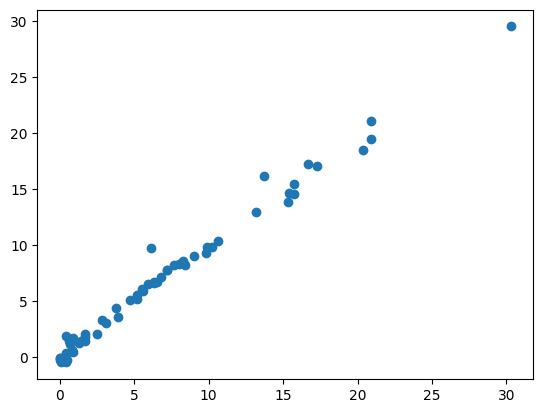

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg= LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred= linreg.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error: 0.5468236465249978
R² Score: 0.9847657384266951


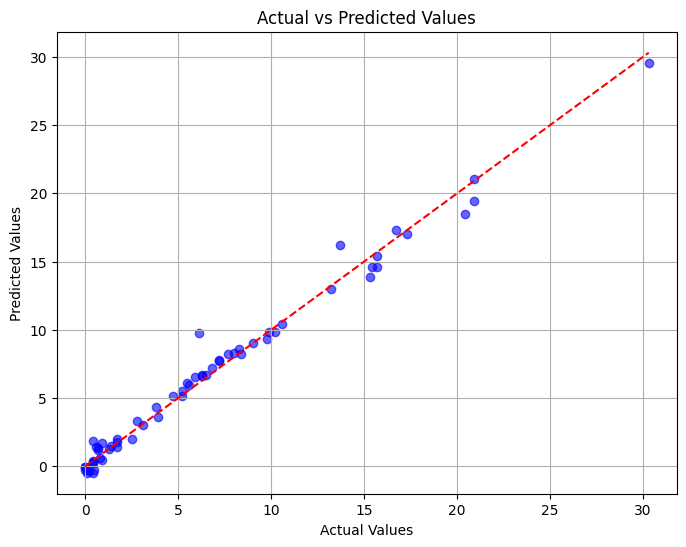

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train the Linear Regression model
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)

# Predict the test set
y_pred = linreg.predict(x_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("R² Score:", score)

# Plot predictions vs true values
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


### Lasso Regression

Mean absolute error 1.133175994914409
R2 score 0.9492020263112388


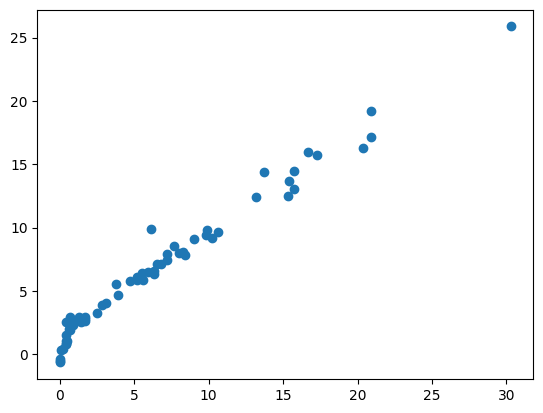

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso= Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred= lasso.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error: 1.133175994914409
R² Score: 0.9492020263112388


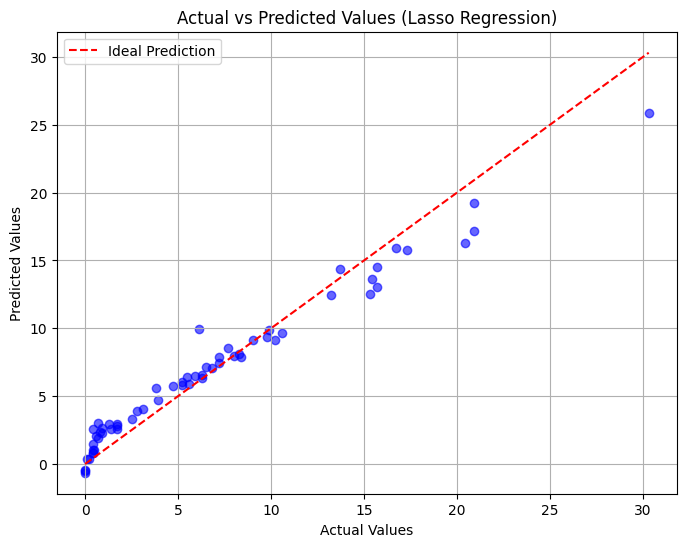

In [79]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train the Lasso Regression model
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)

# Predict the test set
y_pred = lasso.predict(x_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("R² Score:", score)

# Plot predictions vs true values
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


### Cross Validation Lasso

In [80]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [82]:
lassocv.predict(x_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [81]:
lassocv.alpha_

0.05725391318234408

In [67]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [68]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

mean_absolute_error 0.619970115826343
r2_score 0.9820946715928275


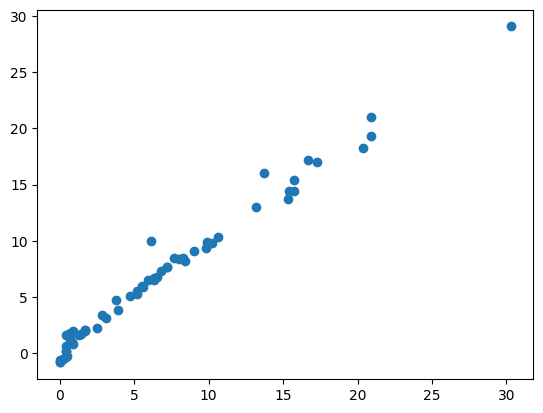

In [84]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)

In [85]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)



RidgeCV(cv=5)

In [71]:
ridgecv.alphas

(0.1, 1.0, 10.0)

### Ridge Regression Model

Mean absolute error 0.5642305340105715
R2 score 0.9842993364555512


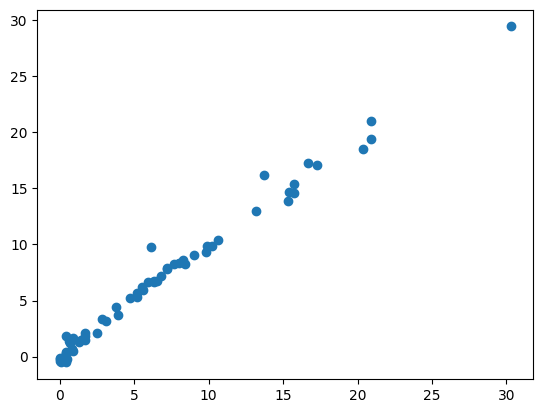

In [86]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge= Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred= ridge.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5642305340105715
R2 score 0.9842993364555512


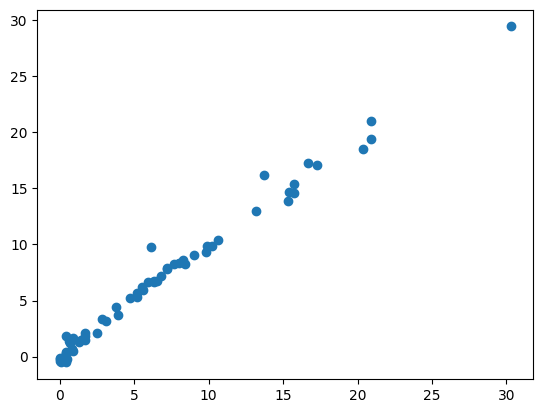

In [87]:
from sklearn.linear_model import RidgeCV
ridgecv= RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred= ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)


In [88]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elasticnet Regresssion

Mean absolute error 1.8822353634896005
R2 score 0.8753460589519703


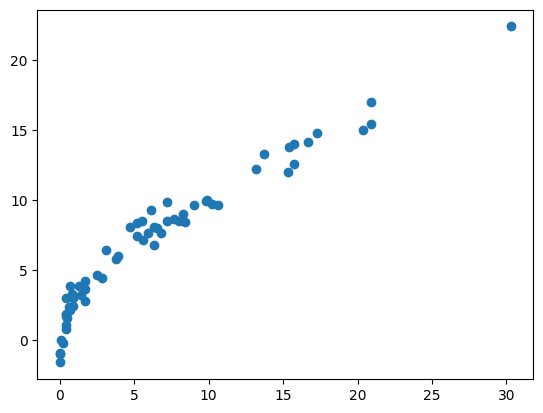

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elast= ElasticNet()
elast.fit(x_train_scaled,y_train)
y_pred= elast.predict(x_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6575946731430898
R2 score 0.9814217587854941


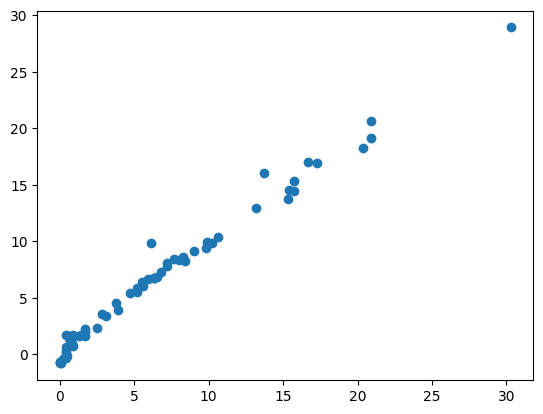

In [91]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)



### pickle the machine learning models, preprocesing model standardscaler

In [92]:
scaler

StandardScaler()

In [93]:
ridge

Ridge()

In [94]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))